# Case Study 

As part of the Google Data Analytics Professional Certificate, I decided to forge my own path and create a case study of my own. 

## Scenario

A Financial Technology (FinTech) company has been services mortgages and wants to streamline part of the process and ensure accuracy. By creating appraisal tools that automate the appraisal and valuation process meets a market demand for faster and more accurate appraisals. At the beginning of the process, the FinTech company wants to see data on the single family loan market. As a company, they already provide a suite of product solutions for the mortgage and housing industry. As they look to build virtual appraisal platform in hopes to streamline the appraisal process for refinances and housing market they decide the following questions will guide the process. 

1. How do the past 12-18 months of lending reflect the longer 3-5 trends in lending? 
2. What trends and market forces have shaped the single family loan market?

The labor supply of appraisers is known to decline, and another team of analysts has already been tasked with market analysis and viability for the product. 


## Data Preparation

Data was accessed from Freddie Mac, and includes monthly and quarterly data. We will create a dataframe that includes all the data from 2002 to Q2 of 2020 laid out on a monthly basis. 

We will: 

1. Import the data
2. Filter any data we do not need
3. Remove null/NA values
4. Reformat data types 
5. Create dataframe copies for feature engineering
6. Export the dataframe to new CSV file

In [1]:
%matplotlib inline
import pandas as pd
from pandas_ui import *
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# Import Data



In [2]:
df_2020 = pd.read_csv('df_2020.csv', parse_dates=['date'])

df_2010_decade = pd.read_csv('df_2010_dec.csv', parse_dates=['date'])

/Users/Justin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_2020.tail()

,credit_score,date,first_buyer,maturity_date,msa,mgt_ins,num_units,occ_status,cltv,dti,...,loan_term,num_borr,seller,servicer,scf,pre_harp_num,prog_indic,h_indic,valuation,interest_only
1432336,798,202101,N,203512,38060.0,0,1,P,12,11,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
1432337,690,202008,Y,205007,35154.0,35,1,P,97,38,...,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
1432338,803,202101,9,205012,NaN,0,1,P,65,36,...,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
1432339,742,202102,9,205007,NaN,0,1,P,80,17,...,354,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
1432340,800,202007,9,203506,35614.0,0,1,P,69,28,...,180,1,"QUICKEN LOANS, LLC","QUICKEN LOANS, LLC",NaN,NaN,9,NaN,1,N


In [12]:
df_2010_decade.tail()

,credit_score,date,first_buyer,maturity_date,msa,mgt_ins,num_units,occ_status,cltv,dti,...,loan_term,num_borr,seller,servicer,scf,pre_harp_num,prog_indic,h_indic,valuation,interest_only
15343350,776,201102,9,204101,NaN,0,1,P,94,42,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
15343351,811,201102,9,204101,34940.0,0,1,S,76,47,...,360,1,BRANCH BANKING & TRUST COMPANY,TRUIST BANK,NaN,NaN,9,NaN,9,N
15343352,774,201012,N,204011,46520.0,0,1,P,73,42,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
15343353,765,201102,Y,204101,46520.0,0,1,P,80,32,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N
15343354,716,201209,N,204011,39300.0,0,1,P,77,39,...,339,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N


# Filtering Data

Quite a bit of this data is irrelevant to the question at hand. While this could be filtered at a database level, the data was accessed without the option to filter. We will be dropping quite a few columns here. 

Also, once we convert the date column to a datetime format we shouldn't need the separate df for 2020 stats. The plan was to also use data from 2000-2009; that part of the data may be added at a later date. 

In [31]:
df_loan = df_2020.append([df_2010_decade])

df_loan = df_loan.drop(columns=['maturity_date', 'msa', 'num_units', 'occ_status', 'amor_type', 
                                'channel', 'num_borr', 'seller', 'servicer', 'scf', 'pre_harp_num', 
                                'prog_indic', 'h_indic', 'interest_only'])


## Convert to Datetime


In order for the visualizations below to work, we will need to convert the 'first_payment_date' column to a datetime format. 

In [32]:
df_loan['date'] = pd.to_datetime(df_loan['date'], format='%Y%m')

In [33]:
df_loan['date']

0          2020-03-01
1          2020-04-01
2          2020-03-01
3          2020-04-01
4          2020-04-01
              ...    
15343350   2011-02-01
15343351   2011-02-01
15343352   2010-12-01
15343353   2011-02-01
15343354   2012-09-01
Name: date, Length: 16775696, dtype: datetime64[ns]

In [41]:
df_loan = df_loan.set_index('date')

Let's check the start and end date to make sure we have the correct format and data. It looks like there is an error somewhere since our date range should be 2010-01-01. We'll see if we can clean this up.

In [34]:
df_loan.head()

,credit_score,date,first_buyer,mgt_ins,cltv,dti,upb,ltv,int_rate,ppm,state,prop_type,zipcode,seq_num,loan_purpose,loan_term,valuation
0,681,2020-03-01,N,30,95,13,52000,95,5.750,N,KS,SF,66400,F20Q10000002,P,360,2
1,775,2020-04-01,N,25,87,29,248000,87,3.250,N,CO,SF,81200,F20Q10000003,P,360,2
2,770,2020-03-01,9,0,65,14,125000,65,3.625,N,MO,SF,63300,F20Q10000004,N,180,2
3,791,2020-04-01,N,0,80,33,58000,80,3.875,N,NY,SF,12100,F20Q10000005,P,360,2
4,697,2020-04-01,9,0,68,35,263000,68,3.750,N,CT,SF,6800,F20Q10000006,N,360,2


## Drop NA Values, Convert Types, ETC.

We can see that most of the 'NA' values or missing data has been removed by simply dropping columns we do not need. However, we should make sure it is clean with 'dropna.'

In [17]:
df_loan = df_loan.dropna()

In [18]:
df_loan['credit_score'].max()

9999

From the user guide we know that the data used various figures such as 9999 to note missing data. 

### Zipcode 

To make use of the goegraphic data, we will need to convert zipcode to a string. In addition, some zipcodes on the East side of the U.S. have one or two zeros at the beginning. To make sure this is consistent we will use zfills to ensure the data is accurate.

In [35]:
# Convert zipcode to string

df_loan['zipcode'] = df_loan['zipcode'].astype(str).str.zfill(5)


df_loan['zipcode'].head()

0    66400
1    81200
2    63300
3    12100
4    06800
Name: zipcode, dtype: object

# Analysis

Now that the data is clean, we can move to putting it to work. The valuation method column was a surprise in the data, not merely the amount of useful data for this project but also that the dataset included valuation method at all. Between that column and the loan purpose column we should be able to provide a clear trend for stakeholders.

In [36]:
s = df_loan.valuation

In [37]:
counts = s.value_counts()
counts

9    11029885
2     4878171
1      745950
3      121690
Name: valuation, dtype: int64

In [38]:
percentage = s.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percentage

9    65.7%
2    29.1%
1     4.4%
3     0.7%
Name: valuation, dtype: object

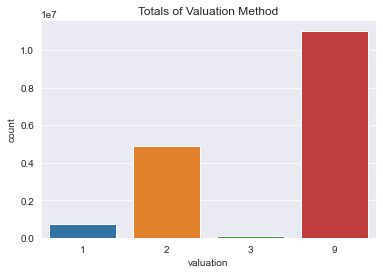

In [24]:
# Plot a bar graph of valuation methods
sns.set_style('darkgrid')
sns.countplot(x='valuation', data=df_loan,).set_title("Totals of Valuation Method");


We can see that 9, which equals no data, is the highest count. There may be a point in time when Freddie Mac did not gather data on valuation methods. 